<a href="https://colab.research.google.com/github/ezahner/IDS/blob/main/Project4/Project4_Part2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Erin Zahner
--






**Project 4 - Part 2 - Python**
---

In [14]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv")


In [15]:
data.describe()

,weight_in_grams,saturated_fat,cholesterol
count,961.000000,961.000000,961.00000
mean,149.409365,3.987617,32.55359
std,175.909357,10.744359,119.96059
min,0.400000,0.000000,0.00000
25%,32.000000,0.000000,0.00000
50%,113.000000,0.400000,0.00000
75%,218.000000,3.300000,20.00000
max,1542.000000,119.900000,2053.00000




---


The first order of business is cleaning up the data of any noise. Looking at the summary of the table, we can see that there are some 0s in all three of the columns. Normally, I would impute these values with the mean, however, in this case these 0s are likely to be accurate. Since we are measuring saturated fat and cholesterol in food, it is likely that some foods (especially if they are in small quantities) should contain 0 values. To avoid skewing the results by imputing the mean, I am choosing to ignore the 0 values.


---



In [16]:
#sort dataset by saturated fat in descending order
sorted_by_satfat = data.sort_values(by='saturated_fat', ascending=False)

#print the first 5 of the table (5 food items with highest levels of sat fat)
print(sorted_by_satfat.head(5))

                                  food item  weight_in_grams  saturated_fat  \
378  CHEESECAKE                    1 CAKE             1110.0          119.9   
535  ICE CREAM; VANLLA; RICH 16% FT1/2 GAL            1188.0          118.3   
458  YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE             1108.0           92.0   
581  CREME PIE                     1 PIE               910.0           90.1   
890  LARD                          1 CUP               205.0           80.4   

     cholesterol  
378         2053  
535          703  
458          609  
581           46  
890          195  



---

Here we can see the results of the 5 foods with the highest saturated fat. The issue with this, however, is that there sizes of the foods vary greatly. For example, this is comparing one whole cheese cake with one cup of lard. This is not a very accurate way to determine which foods actually have the highest saturated fat overall. Instead, we should look at the saturated fat per gram and compare based on that.


---



In [17]:
#create a new column for saturated fat per gram
data['saturated_fat_per_gram'] = data['saturated_fat'] / data['weight_in_grams']

#sort saturated fat per gram in descending order
sorted_by_fat_per_gram = data.sort_values(by='saturated_fat_per_gram', ascending=False)


#print the first 5 rows
print(sorted_by_fat_per_gram.head(5))

                                  food item  weight_in_grams  saturated_fat  \
908  BUTTER; SALTED                1 TBSP               14.0            7.1   
909  BUTTER; UNSALTED              1 TBSP               14.0            7.1   
710  BUTTER; UNSALTED              1/2 CUP             113.0           57.1   
709  BUTTER; SALTED                1/2 CUP             113.0           57.1   
913  BUTTER; UNSALTED              1 PAT                 5.0            2.5   

     cholesterol  saturated_fat_per_gram  
908           31                0.507143  
909           31                0.507143  
710          247                0.505310  
709          247                0.505310  
913           11                0.500000  


---
After calculating the saturated fat per gram, we can see that the foods with the highest saturated fat have changed. Now, the foods with the highest saturated fat per gram are salted and unsalted butter.



---




In [18]:
from scipy import stats

#find outliers for saturated fat per gram

#scale sat fat per gram
data['scaled_sat_fat_per_gram'] = stats.zscore(data.saturated_fat_per_gram, nan_policy='omit')

#finds the outliers
sat_fat_outliers = data[(data['scaled_sat_fat_per_gram'] > 3) | (data['scaled_sat_fat_per_gram'] < -3)]

#sorts the values in descending order
sat_fat_outliers = sat_fat_outliers.sort_values(by='scaled_sat_fat_per_gram', ascending=False)

num_outliers = len(sat_fat_outliers)

#print out results
print("There are ", num_outliers, " outliers")
print(sat_fat_outliers)


There are  15  outliers
                                  food item  weight_in_grams  saturated_fat  \
908  BUTTER; SALTED                1 TBSP              14.00            7.1   
909  BUTTER; UNSALTED              1 TBSP              14.00            7.1   
709  BUTTER; SALTED                1/2 CUP            113.00           57.1   
710  BUTTER; UNSALTED              1/2 CUP            113.00           57.1   
912  BUTTER; SALTED                1 PAT                5.00            2.5   
913  BUTTER; UNSALTED              1 PAT                5.00            2.5   
899  LARD                          1 TBSP              13.00            5.1   
890  LARD                          1 CUP              205.00           80.4   
920  IMITATION CREAMERS; POWDERED  1 TSP                2.00            0.7   
210  CHOCOLATE; BITTER OT BAKING   1 OZ                28.35            9.0   
492  COCONUT; DRIED; SWEETND;SHREDD1 CUP               93.00           29.3   
576  COCONUT; RAW; PIECE    

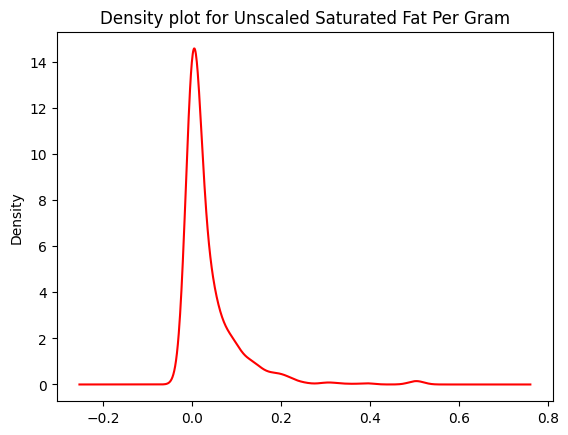

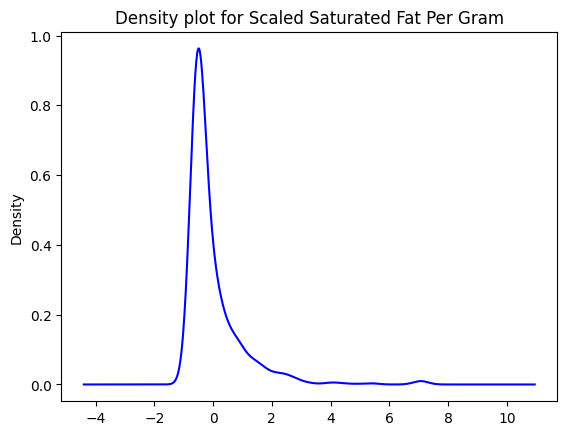

In [19]:
import matplotlib.pyplot as plt


data.saturated_fat_per_gram.plot.density(color="red")
plt.title('Density plot for Unscaled Saturated Fat Per Gram')
plt.show()


data.scaled_sat_fat_per_gram.plot.density(color="blue")
plt.title('Density plot for Scaled Saturated Fat Per Gram')
plt.show()

In [20]:
#find outliers for other numeric values - weight

#scale sat fat per gram
data['scaled_weight'] = stats.zscore(data.weight_in_grams, nan_policy='omit')

#finds the outliers
weight_outliers = data[(data['scaled_weight'] > 3) | (data['scaled_weight'] < -3)]

#sorts the values in descending order
weight_outliers = weight_outliers.sort_values(by='scaled_weight', ascending=False)

num_outliers = len(weight_outliers)

#print out results
print("There are ", num_outliers, " outliers")
print(weight_outliers)


There are  22  outliers
                                  food item  weight_in_grams  saturated_fat  \
696  SHERBET; 2% FAT               1/2 GAL            1542.0           19.0   
422  CARROT CAKE;CREMCHESE FRST;REC1 CAKE             1536.0           66.0   
376  FRUITCAKE;DARK; FROM HOMERECIP1 CAKE             1361.0           47.6   
535  ICE CREAM; VANLLA; RICH 16% FT1/2 GAL            1188.0          118.3   
445  WHITE CAKE W/ WHT FRSTNG;COMML1 CAKE             1140.0           33.1   
378  CHEESECAKE                    1 CAKE             1110.0          119.9   
458  YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE             1108.0           92.0   
423  YELLOW CAKE W/ CHOC FRST;FRMIX1 CAKE             1108.0           47.8   
410  DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE             1107.0           55.6   
479  SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE             1096.0           41.6   
466  ICE CREAM; VANLLA; REGULR 11% 1/2 GALN           1064.0           71.3   
433  ICE MILK; VANILLA; 4% F

In [21]:
#find outliers for other numeric values - weight

#scale sat fat per gram
data['scaled_cholesterol'] = stats.zscore(data.cholesterol, nan_policy='omit')

#finds the outliers
cholesterol_outliers = data[(data['scaled_cholesterol'] > 3) | (data['scaled_cholesterol'] < -3)]

#sorts the values in descending order
cholesterol_outliers = cholesterol_outliers.sort_values(by='scaled_cholesterol', ascending=False)

num_outliers = len(cholesterol_outliers)

#print out results
print("There are ", num_outliers, " outliers")
print(cholesterol_outliers)


There are  17  outliers
                                  food item  weight_in_grams  saturated_fat  \
378  CHEESECAKE                    1 CAKE             1110.0          119.9   
422  CARROT CAKE;CREMCHESE FRST;REC1 CAKE             1536.0           66.0   
384  POUND CAKE; COMMERCIAL        1 LOAF              500.0           52.0   
361  CUSTARD PIE                   1 PIE               910.0           33.7   
452  LEMON MERINGUE PIE            1 PIE               840.0           26.0   
535  ICE CREAM; VANLLA; RICH 16% FT1/2 GAL            1188.0          118.3   
430  PUMPKIN PIE                   1 PIE               910.0           38.2   
376  FRUITCAKE;DARK; FROM HOMERECIP1 CAKE             1361.0           47.6   
479  SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE             1096.0           41.6   
458  YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE             1108.0           92.0   
410  DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE             1107.0           55.6   
423  YELLOW CAKE W/ CHOC FRS



---

Here, I found that there were 22 outliers in both the weight and cholesterol data. Cheesecake is a very extreme outlier for cholesterol, with a scaled value of 16.85. In normal cases, one may assume there has been a mistake to have such an extreme outlier, however, I believe that it is very acurate as a measure of cholestoral in a whole cheesecake. There are also some outliers present in the weight data, however, nothing sticks out quite as much.


---







---

**Conclusion**
Overall, we can see that there are some anomalies within the data. There are several values that would normally be considered "noise" within the data, however, because we are looking at things such as nutritional facts and weight, I determined that the noise is more likely accurate than skewing the data. The only thing that was majorly skewing the data was looking at every food item the same, regardless of the measurement, such as a whole cheesecake vs 1 TBSP of butter. To handle this, I added the column for saturated fat per gram. Other than that, this data set is a good represantation of food data.


---

